# Price Prediction - Brasília Apartments

+WebScrapping +Regression

<h4>This is my very first Regression project and I really wanna know what you guys think about that. I'm open to all improvements, rewording or criticism. Please don't hesitate to leave me a comment or upvote. It will motivate me a lot to keep doing it.<h4/> 😉

* [1 Introduction](#introduction)
* [2 Data](#data)
* [3 Methodology](#methodology)
* [4 Data Extraction](#dex) 
    * [4.1 Web Scraping - Vivareal WebSite](#ws_vr)
* [5 Data Check](#Dc)
    * [ 5.1 Percentage Null Values](#pnv)
* [6 Feature Engineering](#FE)
    * [6.1 Address](#address)
        * [6.1.1 Address and Neighborhood](#an)
        * [6.1.2 Neighborhood Null Values](#nnv)
        * [6.1.3 Defining ARs](#dars)
        * [6.1.4 New Address Null Values](#nanv)
    * [6.2 Apartament Characteristics](#ach)
        * [6.2.1 Room Null Values](#rnv)
        * [6.2.2 Bathrooms Null Values](#bnv)
        * [6.2.3 Garage Null Values](#gnv)
        * [6.2.4 Condo Fees Null Values](#cfnv)
        * [6.2.5 Value Null Values](#vnv)
* [7 New Features](#NF)
    * [7.1 Geo Location](#gl)
    * [7.2 Distance To Brasília Downtown](#dttbd)
    * [7.3 Per Capita Income](#pci)
    * [7.4 Population](#p)
* [8 Data Visualization](#DV)
    * [8.1 Map Plot](#mp)
    * [8.2 Box Plot](#bpao)
    * [8.3 Distribution Plot](#dp)
    * [8.4 Log Transformation and Preprocessing Scale](#ltaps)
    * [8.5 Correlation](#c)
* [9 Modeling](#M)
    * [9.1 Train Test Split](#tts)
    * [9.2 Pipeline Hyperparameter Tuning](#pht)
* [10 Results](#R)
    * [10.1 Score Rˆ2](#scor)
    * [10.2 Predictions](#pred)
    * [10.3 Prediction Error Plot](#pep)
    * [10.4 Metrics Results](#mr)
    * [10.5 Saving the Model](#sm)
* [11 Conclusion](#CON)



<a id="introduction"></a>
# Introduction 

The main objective of the project was to work with a messy data set, extracted from the web and even with a relatively small dataset, build a good price predictor with a regression model.

In this notebook we will use Web Scraping technique on the Villa Real website. We will get a few features from the main page of the site. So, we will try to don't waste any information however we will spend a lot of time in the feature engineering processes to be able to build a regression model that gives us a very good score.


:)

Have fun!

<a id="data"></a>
# Data 

The data that we will use was extraction using Web Scraping technique from Viva Real Website, one of the Brazilians biggest real estate seller websites. We extracted information about apartments from all over Brasília, the capital of Brazil. After query about apartments in Brasília in the website each container shows:
The address, a title, the area in m², the number of rooms, number of bathrooms, number of garages, the condo fees, the price and amenidades items as shown in the image below.

<br>
<br>


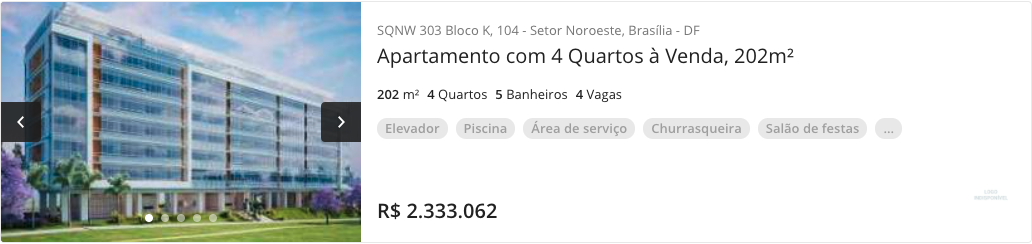

<br>
<br>

Ps: Most of the time those informations are not completely filled for the apartaments owners.

<a id="Methodology"></a>
# Methodology 

As said before, the aim of this project is to use WebScraping technique to extract data from the web. Cleaning and organizing the data and creating new features to help us to build a good regression model to price preditionns.

 * To clean and organize with the data we are going to use the **Pandas** and **Numpy** libraries 
 * We are going to use the **Busca CEP API** to organize the address features. With the neighborhood of the apartaments we will be able to create a new feature called Administrative Region (AR).
 * With Address, Neighborhood and AR we will be able to find the best value to fill null values of the apartments characteristics, looking for the median of the characteristics in the same address, same neighborhood or same AR  
 * After that we are going to use **Geopy** to find the geolocation of the apartaments. 
 * Using the geolocation and the **Haversine Formula** We are going to calculate a new feature called Distance to the Brasília Downtown.
 * Again we will use **Web Scraping** with **BeautifulSoup Library** in Wikipedia to find Per Capita Income (PCI) and Population of the Administrative Regions. 
 * For the Data Visualization we are going to use **Folium Library**, **Fast Marker Cluster plugin**, **Seaborn**  and **Matplotlib**.
 * Before find the best **Linear Regression**, to normalize the data we're use **numpy** and to scale we're going to use **preprocessing** 
 * To choose the best model between, **Lasso (l1)**, **Kernel Ridge (l2)**, **Elastic NNet**, **Xgb Regressor** or **Lgbm Regressor**  we are going to create a **Pipeline** with **Hyperparameter Tuning** using **Grid Search** and **K-Folds** shuffed.
 * Finally after finding our model we will plot the **PredictionError** using **Yellowbrick** library and use **Sklearn Metrics** to measure the results of our model.
 
 
 So, let's get it started! :)


<a id="dex"></a>
# 4 Data Extraction

First of all, we will  WebScrapping the Viva Real website. To do that we are going to use the BeautifulSoup package. I want to thank [Mrs. Adativa](https://www.kaggle.com/aliceadativa) for this very helpful notebook published here on [Kaggle](https://www.kaggle.com/aliceadativa/web-scraping-com-python-parte-1). Also, I want to thank [Anki Kumar](https://www.kaggle.com/ankikumar) that made a [nice job](https://www.kaggle.com/ankikumar/script-for-extracting) using the Chrome Drive on Kaggle Kernel.

<a id="ws_vr"></a>

## 4.1 Web Scrapping - Vivareal WebSite 

In [1]:
! pip install --upgrade pip
! pip install selenium
! pip install webdriver_manager

     |████████████████████████████████| 1.5 MB 425 kB/s 
  Attempting uninstall: pip
    Found existing installation: pip 20.3.1
    Uninstalling pip-20.3.1:
      Successfully uninstalled pip-20.3.1
     |████████████████████████████████| 904 kB 422 kB/s 


In [2]:
import pandas as pd
import numpy as np

from time import sleep
from random import randint


from bs4 import BeautifulSoup
from selenium import webdriver

In [3]:
# Preparing the chromedriver on kaggle
!apt-get update # to update ubuntu to correctly run apt install
!apt install -y chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Get:1 http://packages.cloud.google.com/apt gcsfuse-bionic InRelease [4114 B]
Get:2 http://packages.cloud.google.com/apt cloud-sdk-bionic InRelease [6774 B]
Get:3 http://packages.cloud.google.com/apt cloud-sdk InRelease [6739 B]
Get:4 http://packages.cloud.google.com/apt cloud-sdk-bionic/main amd64 Packages [157 kB]
Get:5 http://packages.cloud.google.com/apt cloud-sdk/main amd64 Packages [149 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [15.3 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [1816 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates/restricted amd64 Packages [266 kB]
Get:13 http://archive.ubuntu.com/ubuntu bionic-up

In [4]:
# Setting the chromedriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  


In [5]:
resut_list = []

In [6]:
# For loop to scraping each page on vivareal website

for i in range(1,88,1):
    
    url = "https://www.vivareal.com.br/venda/distrito-federal/brasilia/?__vt=rpci:a&pagina="+str(i)+"#onde=BR-Distrito_Federal-NULL-Brasilia,BR-Distrito_Federal-NULL-Brasilia-Barrios-Asa_Sul,BR-Distrito_Federal-NULL-Brasilia-Barrios-Asa_Norte,BR-Distrito_Federal-NULL-Aguas_Claras&tipos=apartamento_residencial"
    
    
    driver.get(url)
    
    sleep(5)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    
    
    apt_div = soup.find_all('article', class_='property-card__container js-property-card')
    
    
    sleep(randint(2,10))
    
    
    for container in apt_div:
        
        resut_dict = {}

        resut_dict['address'] = container.h2.find('span', class_="property-card__address").text
        resut_dict['titles'] = container.h2.find('span', class_="property-card__title js-cardLink js-card-title").text
        resut_dict['areas m²'] = container.ul.find('li', class_="property-card__detail-item property-card__detail-area").text
        resut_dict['rooms'] = container.ul.find('li', class_="property-card__detail-item property-card__detail-room js-property-detail-rooms").text
        resut_dict['bathrooms'] = container.ul.find('li', class_="property-card__detail-item property-card__detail-bathroom js-property-detail-bathroom").text
        resut_dict['garages'] = container.ul.find('li', class_="property-card__detail-item property-card__detail-garage js-property-detail-garages").text
        resut_dict['condo_fees'] = []
        resut_dict['price'] = container.section.find('div', class_="property-card__price js-property-card-prices js-property-card__price-small").text


        if container.find('strong', class_='js-condo-price')== None:  
            resut_dict['condo_fees'].append(None)
        else:
            resut_dict['condo_fees'].append(container.find('strong', class_='js-condo-price').text)

        for item in container.find_all('li',class_="amenities__item"):
            resut_dict[item.get_text().lower()] = 1

        
        resut_list.append(resut_dict)

In [7]:
df = pd.DataFrame(resut_list)

In [8]:
df.head()

,address,titles,areas m²,rooms,bathrooms,garages,condo_fees,price,elevador,ar-condicionado,...,aquecimento,spa,quadra de tênis,cinema,depósito,sala grande,ventilação natural,vista para o mar,lareira,salão de jogos
0,"SQS 103 Bloco A, 310 - Asa Sul, Brasília - DF",\n Apartamento com 3 Quartos à ...,\n\n 105\n \n\n ...,\n\n 3\n \n\n ...,\n\n 4\n \n\n ...,\n\n 1\n \n\n ...,[\n R$ 1.000\n ...,\n\n R$ 1.299.000\n ...,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"CLNW 10/11 Lote G, 0 - Setor Noroeste, Brasíli...",\n Paulo Zimbres Dou Center\n ...,\n\n 34-92\n \n\n ...,\n\n 1\n \n\n ...,\n\n 1\n \n\n ...,\n\n 1\n \n\n ...,[None],\n \n Sob Consulta\n...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"SGCV Lote 14, 19 - Zona Industrial, Brasília - DF",\n Apartamento com 4 Quartos à ...,\n\n 154\n \n\n ...,\n\n 4\n \n\n ...,\n\n 6\n \n\n ...,\n\n 3\n \n\n ...,[None],\n\n R$ 1.850.000\n ...,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"QSB AE - Taguatinga Sul, Brasília - DF",\n Apartamento com 2 Quartos à ...,\n\n 54\n \n\n ...,\n\n 2\n \n\n ...,\n\n 1\n \n\n ...,\n\n --\n \n\n...,[None],\n\n R$ 125.000\n ...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"SQS 203 Bloco J, 105 - Asa Sul, Brasília - DF",\n Apartamento com 2 Quartos à ...,\n\n 69\n \n\n ...,\n\n 2\n \n\n ...,\n\n 2\n \n\n ...,\n\n --\n \n\n...,[\n R$ 625\n ...,\n\n R$ 720.000\n ...,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.to_csv('Brasilia_Apartaments_Raw.csv')

In [10]:
# Cleaning the informations and defining the the df column

df['titles'] = df['titles'].str.replace('\n','')
df['price'] = df['price'].str.replace('.','')
df['condo_fees'] = df['condo_fees'].astype(str).str.replace('.','').str.replace('[','').str.replace(']','')
df['price'] = df['price'].str.extract('(\d+)').astype(float)
df['condo_fees'] = df['condo_fees'].astype(str).str.extract('(\d+)').astype(float)
df['areas m²'] = df['areas m²'].astype(str).str.extract('(\d+)').astype(float)
df['rooms'] = df['rooms'].astype(str).str.extract('(\d+)').astype(float)
df['bathrooms'] = df['bathrooms'].astype(str).str.extract('(\d+)').astype(float)
df['garages'] = df['garages'].astype(str).str.extract('(\d+)').astype(float)
df['condo_fees'] = df['condo_fees'].astype(str).str.extract('(\d+)').astype(float)

In [11]:
df.shape

(3105, 51)

So, we ended with a data frame that has 3114 rows and 51 columns.



<a id="Dc"></a>
# 5 Data Check 

In [12]:
df.head()

,address,titles,areas m²,rooms,bathrooms,garages,condo_fees,price,elevador,ar-condicionado,...,aquecimento,spa,quadra de tênis,cinema,depósito,sala grande,ventilação natural,vista para o mar,lareira,salão de jogos
0,"SQS 103 Bloco A, 310 - Asa Sul, Brasília - DF",Apartamento com 3 Quartos à Ve...,105.0,3.0,4.0,1.0,1000.0,1299000.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"CLNW 10/11 Lote G, 0 - Setor Noroeste, Brasíli...",Paulo Zimbres Dou Center ...,34.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"SGCV Lote 14, 19 - Zona Industrial, Brasília - DF",Apartamento com 4 Quartos à Ve...,154.0,4.0,6.0,3.0,NaN,1850000.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"QSB AE - Taguatinga Sul, Brasília - DF",Apartamento com 2 Quartos à Ve...,54.0,2.0,1.0,NaN,NaN,125000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"SQS 203 Bloco J, 105 - Asa Sul, Brasília - DF",Apartamento com 2 Quartos à Ve...,69.0,2.0,2.0,NaN,625.0,720000.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id="pnv"></a>

## 5.1 Null values

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3105 entries, 0 to 3104
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   address                3105 non-null   object 
 1   titles                 3105 non-null   object 
 2   areas m²               3105 non-null   float64
 3   rooms                  3103 non-null   float64
 4   bathrooms              3095 non-null   float64
 5   garages                2326 non-null   float64
 6   condo_fees             2254 non-null   float64
 7   price                  3081 non-null   float64
 8   elevador               1314 non-null   float64
 9   ar-condicionado        192 non-null    float64
 10  bicicletário           5 non-null      float64
 11  piscina                917 non-null    float64
 12  área de serviço        756 non-null    float64
 13  churrasqueira          1225 non-null   float64
 14  salão de festas        1223 non-null   float64
 15  ... 

In [14]:
# Total missing value

missing_values_count = df.isnull().sum()

missing_values_count.head()

address       0
titles        0
areas m²      0
rooms         2
bathrooms    10
dtype: int64

In [15]:
# Total percent missing value

total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()


percent_missing = (total_missing/total_cells) * 100

print(percent_missing)

78.92456821698084


In [16]:
# Checking if the binary features missing value

missing_values_count =df[df.columns[8:51]].isnull().sum()

total_cells = np.product(df[df.columns[8:51]].shape)
total_missing = missing_values_count.sum()


percent_missing = (total_missing/total_cells) * 100

print(percent_missing)

92.36040894281541


More than 90% of the amenities items are null and we can't know if these values ​​are empty because there is not the feature or they forgot to fill those options.
So let's drop it.


In [17]:
# Dropping the column

df = df.drop(df[df.columns[8:51]], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3105 entries, 0 to 3104
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     3105 non-null   object 
 1   titles      3105 non-null   object 
 2   areas m²    3105 non-null   float64
 3   rooms       3103 non-null   float64
 4   bathrooms   3095 non-null   float64
 5   garages     2326 non-null   float64
 6   condo_fees  2254 non-null   float64
 7   price       3081 non-null   float64
dtypes: float64(6), object(2)
memory usage: 194.2+ KB


In [18]:
# Percentage of Missing values after drop binary features

missing_values_count = df.isnull().sum()

total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()


percent_missing = (total_missing/total_cells) * 100

print(percent_missing)

6.706924315619968


Way better...

<a id="FE"></a>

# 6 Feature Engineering

The Addresses in Brasília is very confusing,  The Federal District of Brazil has 33 Administrative Regions (AR). Each of them has their own address system. People often get confused setting the address and probably fill the address wrong on the Vila real website. So our idea here is organize, splitting from the address column, which the property owner filled, into a new address column, neighborhood and the AR. 

We will send pieces of the address values to the correios API (The Brazilian mail service) to return the address organized in Address  and Neighborhood. After that, we are going to search on the web to find the AR for each neighborhood.

Those features organized and accurate will be very important in the future to fill the apartament characteristics with a high local precision and add new features about the apartaments to our data frame.

<a id="address"></a>
## 6.1 Address





<a id="an"></a>
### 6.1.1 Address  and  Neighborhood

As said before, we are going to organize the addresses splitting the column address. Using the [Busca Cep API](https://github.com/arthurfortes/consulta_correios), created by [Arthur Fortes](https://github.com/arthurfortes), we will be able to get the correct address and the neighborhood extracted from the Correios Web site.
Recently, I've also contributed with Busca Cep API on Github to updating the Web Scraping code.



In [19]:
! pip install Consulta-Correios
! pip install unidecode

In [20]:
import consulta_correios
from unidecode import unidecode

The two next functions will do the following steps. 
 * The first one will send pieces of the address columns to the Busca CEP API. It will return a dataframe with a few addresses and neighborhoods that correspond with the parts sended. 
 * The second function will confirm if the parts sent are in the dataframe returned.
 
 After the second function, confirm the data returned and send back to the first function. The first function will set the new address and the neighborhood values.



In [21]:
def correios_api(address):
    
    # Splitting the string from address value. 
    address_call = address.replace('-',",").split(',')[:4]
    # Creating a list that contains all string parts. We are going to ignore the parts smaller than 2 caracteres.
    l = []
    for i in address_call:
        i = unidecode(i).strip()
        if len(i) > 2:
            l.append(i)
    
    # From the list, we will try a few combinations of parts to sended to the busca cep API.
    # Prioritizing send more information + Brasília/DF
    try:
        call = str(l[0]+" "+l[1]+" "+l[2]).replace('Brasilia','').replace('DF','')
        address_df = pd.DataFrame(consulta_correios.busca_cep(str(call+" Brasília/DF")))   
        match = check_address(address_df,l[0],l[1])

        return pd.Series([match['address'], match['neighborhood']])
        pass
    except:
        try:
            call = str(l[0]+" "+l[-1]).replace('Brasilia','').replace('DF','')
            address_df = pd.DataFrame(consulta_correios.busca_cep(str(call+" Brasília/DF")))   
            match = check_address(address_df,l[0],l[1])

            return pd.Series([match['address'], match['neighborhood']])
            pass
        except:
            try:
                call = str(l[0]+" "+l[1]).replace('Brasilia','').replace('DF','')
                address_df = pd.DataFrame(consulta_correios.busca_cep(str(call+" Brasília/DF")))   

                match = check_address(address_df,l[0],l[1])

                return pd.Series([match['address'], match['neighborhood']])
                pass
            except:
                try:
                    call = str(l[0]).replace('Brasilia','').replace('DF','')
                    address_df = pd.DataFrame(consulta_correios.busca_cep(str(call+" Brasília/DF")))
                    match = check_address(address_df,l[0],l[1])

                    return pd.Series([match['address'], match['neighborhood']])
                    pass
                except:
                    return pd.Series([None, None])
                    pass



When we get a return from the tries. We are going to check if the address and neighborhood from address_DF returned are equal to the string parts sent. So then we will return a match to the first function to define the two new columns. "Address_'' and "Neighborhood".


In [22]:
def check_address(address_df,l0,l1):
    
    # Here we will try to find some combinations of the parts from old address column in the address_df returned from Busca Cep API 
    try:
        row = address_df.loc[(address_df['address']==l0)&(address_df['neighborhood']==l1)]
        if len(row)>=1:
            match = row.reset_index(drop=True).loc[0]
        return match
    except:
        try:
            row = address_df.loc[(address_df['address']==l0)&(address_df['neighborhood'].str.contains(l1, na=False, case=False))]
            if len(row)>=1:
                match = row.reset_index(drop=True).loc[0]
            return match
        except:
            try:
                row = address_df.loc[address_df['address']==l0]
                if len(row)>=1:
                    match = row.reset_index(drop=True).loc[0]
                return match
            except:
                try:
                    row = address_df[address_df['address'].str.contains(l0, na=False, case=False)]
                    if len(row) >= 1: 
                        match = row.reset_index(drop=True).loc[0]
                    return match
                except:
                    pass
    


In [23]:
df['address_'] = ''
df['neighborhood'] = ''

In [24]:
%%time
# Running this to functions in all address values from our list.

df[['address_','neighborhood']] = df.apply(lambda x: correios_api(x["address"]),axis=1)

CPU times: user 2min 52s, sys: 3.17 s, total: 2min 55s
Wall time: 1h 49min 53s


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3105 entries, 0 to 3104
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       3105 non-null   object 
 1   titles        3105 non-null   object 
 2   areas m²      3105 non-null   float64
 3   rooms         3103 non-null   float64
 4   bathrooms     3095 non-null   float64
 5   garages       2326 non-null   float64
 6   condo_fees    2254 non-null   float64
 7   price         3081 non-null   float64
 8   address_      2263 non-null   object 
 9   neighborhood  2263 non-null   object 
dtypes: float64(6), object(4)
memory usage: 242.7+ KB


Now there are 847 missing values in Neighborhood and the new Address column.

<a id="nnv"></a>
### 6.1.2 Neighborhood Null Values

Now, to fill Neighborhood null values, we will create a list of unique Neighborhood values to check if they are in the old address columns.

In [26]:
# Defining a list of neighborhood unique values

neighborhood_ = df['neighborhood'].str.strip().dropna().unique().tolist()

neighborhood_

['Asa Sul',
 'Setor Noroeste',
 'Zona Industrial (Guara)',
 'Taguatinga Sul (Taguatinga)',
 'Norte (Aguas Claras)',
 'Setor Sudoeste',
 'Asa Norte',
 'Setor Industrial (Taguatinga)',
 'Samambaia Sul (Samambaia)',
 'Taguatinga Norte (Taguatinga)',
 'Sobradinho',
 'Sul (Aguas Claras)',
 'Guara I',
 'Setor Central (Gama)',
 'Ceilandia Norte (Ceilandia)',
 'Guara II',
 'Setor de Habitacoes Individuais Norte',
 'Samambaia Norte (Samambaia)',
 'Nucleo Bandeirante',
 'Setores Complementares',
 'Setor de Habitacoes Individuais Sul',
 'Area Octogonal',
 'Zona Industrial',
 'Areal (Aguas Claras)',
 'Setor Habitacional Vicente Pires',
 'Quadras Economicas Lucio Costa (Guara)',
 'Setor Industrial (Ceilandia)',
 'Riacho Fundo I',
 'Centro (Sao Sebastiao)',
 'Bela Vista (Sao Sebastiao)',
 'Setor Meireles (Santa Maria)',
 'Cruzeiro Novo',
 'Taguatinga Centro (Taguatinga)',
 'Nucleo Rural Vargem Bonita (Park Way)',
 'Ceilandia Sul (Ceilandia)',
 'Condominio Imperio dos Nobres (Sobradinho)',
 'Santa Ma

In [27]:
# Removing parentheses and blank spaces from the list

neighborhood_list = ['']

for i in neighborhood_:
    
    x = i.replace('(','').replace(')','').strip()
    neighborhood_list.append(x)


In [28]:
neighborhood_list.remove('')

neighborhood_list

['Asa Sul',
 'Setor Noroeste',
 'Zona Industrial Guara',
 'Taguatinga Sul Taguatinga',
 'Norte Aguas Claras',
 'Setor Sudoeste',
 'Asa Norte',
 'Setor Industrial Taguatinga',
 'Samambaia Sul Samambaia',
 'Taguatinga Norte Taguatinga',
 'Sobradinho',
 'Sul Aguas Claras',
 'Guara I',
 'Setor Central Gama',
 'Ceilandia Norte Ceilandia',
 'Guara II',
 'Setor de Habitacoes Individuais Norte',
 'Samambaia Norte Samambaia',
 'Nucleo Bandeirante',
 'Setores Complementares',
 'Setor de Habitacoes Individuais Sul',
 'Area Octogonal',
 'Zona Industrial',
 'Areal Aguas Claras',
 'Setor Habitacional Vicente Pires',
 'Quadras Economicas Lucio Costa Guara',
 'Setor Industrial Ceilandia',
 'Riacho Fundo I',
 'Centro Sao Sebastiao',
 'Bela Vista Sao Sebastiao',
 'Setor Meireles Santa Maria',
 'Cruzeiro Novo',
 'Taguatinga Centro Taguatinga',
 'Nucleo Rural Vargem Bonita Park Way',
 'Ceilandia Sul Ceilandia',
 'Condominio Imperio dos Nobres Sobradinho',
 'Santa Maria',
 'Riacho Fundo II',
 'Setor Habita

In [29]:
# Looking in the old address column for neighborhood names and filling neighborhoods values found

for index, row in df.iterrows():
    
    if pd.isna(df['neighborhood'][index]):
        nan = df['address'][index].replace('-',",").split(',')
        l = []
        for i in nan:
            i = unidecode(i)
            i = i.strip()
            if len(i) > 1:
                l.append(i)
        for i in l:
            if any(i in s for s in neighborhood_list):
                df['neighborhood'][index] = i.strip()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [30]:
# Checking the remnants

df[pd.isna(df['neighborhood'])]

,address,titles,areas m²,rooms,bathrooms,garages,condo_fees,price,address_,neighborhood
352,Brasília - DF,Apartamento com 3 Quartos à Ve...,63.0,3.0,1.0,NaN,360.0,360000.0,None,None
460,Brasília - DF,Apartamento com 2 Quartos à Ve...,56.0,2.0,2.0,2.0,421.0,240000.0,None,None
1652,"Setor Oeste, Brasília - DF",Apartamento com 2 Quartos à Ve...,34.0,2.0,1.0,NaN,200.0,125000.0,None,None
1660,"Setor Oeste, Brasília - DF",Apartamento com 2 Quartos à Ve...,34.0,2.0,1.0,NaN,200.0,125000.0,None,None
2036,"Setor Habitacional Samambaia, Brasília - DF",Apartamento com 2 Quartos à Ve...,50.0,2.0,1.0,NaN,NaN,150000.0,None,None
2173,"Setor Habitacional Samambaia, Brasília - DF",Apartamento com 3 Quartos à Ve...,84.0,3.0,1.0,NaN,200.0,280000.0,None,None
2354,"Setor Habitacional Samambaia, Brasília - DF",Apartamento com Quarto à Vend...,48.0,1.0,1.0,NaN,150.0,95000.0,None,None


In [31]:
# Filling the remnants values (Searching the address on Google)

df.loc[df['address']=='Setor Oeste, Brasília - DF','neighborhood']='Setor Oeste'
df.loc[df['address']=='Setor Habitacional Samambaia, Brasília - DF','neighborhood']='Setor Habitacional Samambaia'

In [32]:
df[pd.isna(df['neighborhood'])]

,address,titles,areas m²,rooms,bathrooms,garages,condo_fees,price,address_,neighborhood
352,Brasília - DF,Apartamento com 3 Quartos à Ve...,63.0,3.0,1.0,NaN,360.0,360000.0,None,None
460,Brasília - DF,Apartamento com 2 Quartos à Ve...,56.0,2.0,2.0,2.0,421.0,240000.0,None,None


In [33]:
# Looking for different names for the same values

df['neighborhood'].unique()

array(['Asa Sul', 'Setor Noroeste', 'Zona Industrial (Guara)',
       'Taguatinga Sul (Taguatinga)', 'Norte (Aguas Claras)',
       'Setor Sudoeste', 'Asa Norte', 'Setor Industrial (Taguatinga)',
       'Samambaia Sul (Samambaia)', 'Taguatinga Norte (Taguatinga)',
       'Sobradinho', 'Sul (Aguas Claras)', 'Guara I',
       'Setor Central (Gama)', 'Ceilandia Norte (Ceilandia)', 'Guara II',
       'Setor de Habitacoes Individuais Norte', 'Sul',
       'Samambaia Norte (Samambaia)', 'Nucleo Bandeirante',
       'Setores Complementares', 'Norte',
       'Setor de Habitacoes Individuais Sul', 'Area Octogonal',
       'Zona Industrial', 'Areal (Aguas Claras)',
       'Setor Habitacional Vicente Pires', 'Samambaia Sul',
       'Setor Industrial', 'Quadras Economicas Lucio Costa (Guara)',
       'Setor Industrial (Ceilandia)', 'Riacho Fundo I',
       'Centro (Sao Sebastiao)', 'Taguatinga Norte',
       'Bela Vista (Sao Sebastiao)', 'Setor Meireles (Santa Maria)',
       'Cruzeiro Novo', 'Tag

In [34]:
# Renaming the different values

#Plano piloto
df.loc[df['neighborhood']=='Asa Sul','neighborhood']='Asa Sul (Plano Piloto)'
df.loc[df['neighborhood']=='Asa Norte','neighborhood']='Asa Norte (Plano Piloto)'
df.loc[df['neighborhood']=='Setor Noroeste','neighborhood']='Setor Noroeste (Plano Piloto)'
df.loc[df['neighborhood']=='Granja do Torto','neighborhood']='Granja do Torto (Plano Piloto)'

# Aguas Claras
df.loc[df['neighborhood']=='Norte','neighborhood']='Norte (Aguas Claras)'
df.loc[df['neighborhood']=='Sul','neighborhood']='Sul (Aguas Claras)'
df.loc[df['neighborhood']=='Setor Habitacional Arniqueira','neighborhood']='Setor Habitacional Arniqueira (Aguas Claras)'

#Taguatinga
df.loc[df['neighborhood']=='Taguatinga Sul','neighborhood']='Taguatinga Sul (Taguatinga)'
df.loc[df['neighborhood']=='Taguatinga Norte','neighborhood']='Taguatinga Norte (Taguatinga)'
df.loc[df['neighborhood']=='Setor Industrial','neighborhood']='Setor Industrial (Taguatinga)'
df.loc[df['neighborhood']=='Taguatinga Centro','neighborhood']='Taguatinga Centro (Taguatinga)'
df.loc[df['neighborhood']=='Setor Hoteleiro','neighborhood']='Setor Hoteleiro (Taguatinga)'

#Lago Sul
df.loc[df['neighborhood']=='Setor de Habitacoes Individuais Sul','neighborhood']='Setor de Habitacoes Individuais Sul (Lago Sul)'

#Lago Norte
df.loc[df['neighborhood']=='Setor de Habitacoes Individuais Norte','neighborhood']='Setor de Habitacoes Individuais Norte (Lago Norte)'

#Samambaia
df.loc[df['neighborhood']=='Samambaia Sul','neighborhood']='Samambaia Sul (Samambaia)'
df.loc[df['neighborhood']=='Samambaia Norte','neighborhood']='Samambaia Norte (Samambaia)'
df.loc[df['neighborhood']=='Setor Habitacional Samambaia','neighborhood']='Samambaia'

#Ceilandia
df.loc[df['neighborhood']=='Ceilandia Norte','neighborhood']='Ceilandia Norte (Ceilandia)'
df.loc[df['neighborhood']=='Ceilandia Sul','neighborhood']='Ceilandia Sul (Ceilandia)'

#Guara
df.loc[df['address'].str.contains('Zona Industrial'),'neighborhood']='Zona Industrial (Guara)'
df.loc[df['address'].str.contains('Quadras Econômicas'),'neighborhood']='Quadras Economicas Lucio Costa'
df.loc[df['neighborhood']=='Setores Complementares','neighborhood']='Setores Complementares (Guara)'
df.loc[df['neighborhood']=='Quadras Economicas Lucio Costa','neighborhood']='Quadras Economicas Lucio Costa (Guara)'
df.loc[df['neighborhood']=='Zona Industrial','neighborhood']='Zona Industrial (Guara)'
df.loc[df['neighborhood']=='Guara II','neighborhood']='Guara II (Guara)'
df.loc[df['neighborhood']=='Guara I','neighborhood']='Guara I (Guara)'

#Gama
df.loc[df['neighborhood']=='Setor Central','neighborhood']='Setor Central (Gama)'
df.loc[df['neighborhood']=='Setor Leste','neighborhood']='Setor Leste (Gama)'
df.loc[df['neighborhood']=='Setor Oeste','neighborhood']='Setor Oeste (Gama)'
df.loc[df['neighborhood']=='Setor Sul','neighborhood']='Setor Sul (Gama)'

#Areal
df.loc[df['neighborhood']=='Areal (Aguas Claras)','neighborhood']='Areal'

#Vicente Pires
df.loc[df['address'].str.contains('Setor Habitacional Vicente Pires'),'neighborhood']='Setor Habitacional Vicente Pires'
df.loc[df['neighborhood']=='Setor Habitacional Vicente Pires - Trecho 3','neighborhood']='Setor Habitacional Vicente Pires'
df.loc[df['neighborhood']=='Setor Habitacional Vicente Pires','neighborhood']='Setor Habitacional Vicente Pires'

#Sobradinho
df.loc[df['neighborhood']=='Grande Colorado','neighborhood']='Grande Colorado (Sobradinho)'
df.loc[df['neighborhood']=='Setor Habitacional Contagem','neighborhood']='Setor Habitacional Contagem (Sobradinho)'

#São sebastiao
df.loc[df['neighborhood']=='Jardins Mangueiral','neighborhood']='Jardins Mangueiral (Sao Sebastiao)'

#sta_maria
df.loc[df['neighborhood']=='Setor Meireles','neighborhood']='Setor Meireles (Santa Maria)'

#nucleo bandeirante
df.loc[df['neighborhood']=='Setor Placa da Mercedes','neighborhood']='Setor Placa da Mercedes (Nucleo Bandeirante)'
df.loc[df['neighborhood']== 'Area de Desenvolvimento Economico','neighborhood']='Area de Desenvolvimento Economico (Nucleo Bandeirante)'


<a id="dars"></a>
### 6.1.3  Defining Administrative Regions (AR)

The Administrative Regions of the Federal District are divisions very similar to the regular cities with their particular administration, address system and neighborhoods.

Here we are going searching on the web to create a list for each AR containing the neighborhoods of each one of them.


In [35]:
# Defining the AR list with the respective neighborhood

# Plano piloto
plano_piloto = ['Asa Sul (Plano Piloto)',
                'Asa Norte (Plano Piloto)',
                'Setor Noroeste (Plano Piloto)',
                'Granja do Torto (Plano Piloto)']

# Aguas claras
aguas_claras = ['Norte (Aguas Claras)',
                'Sul (Aguas Claras)',
                'Aguas Claras',
                'Area de Desenvolvimento Economico (Aguas Claras)',
                'Setor Habitacional Arniqueira (Aguas Claras)']


# Taguatinga
taguatinga = [ 'Taguatinga',
            'Taguatinga Centro (Taguatinga)',
            'Setor Hoteleiro (Taguatinga)',
            'Taguatinga Sul (Taguatinga)',
            'Taguatinga Norte (Taguatinga)',
            'Setor Industrial (Taguatinga)']

# Lago sul
lago_sul = ['Setor de Habitacoes Individuais Sul (Lago Sul)']

# Lago norte
lago_norte = ['Setor de Habitacoes Individuais Norte (Lago Norte)']
        
# Samambaia
samambaia = ['Samambaia Sul (Samambaia)',
            'Samambaia Norte (Samambaia)',
            'Samambaia']
   
# Ceilandia

ceilandia = ['Ceilandia Sul (Ceilandia)',
        'Condominio Prive Lucena Roriz (Ceilandia)',
        'Area de Desenvolvimento Economico (Ceilandia)',
        'Ceilandia Norte (Ceilandia)',
        'Setor Industrial (Ceilandia)']
 
# Cruzeiro
cruzeiro = ['Cruzeiro Novo',
            'Cruzeiro Velho']


# Sudoeste/Octogonal
sud_oct = ['Area Octogonal',
        'Setor Sudoeste']
        
# Guara        
guara = ['Zona Industrial (Guara)',
        'Quadras Economicas Lucio Costa (Guara)',
        'Setores Complementares (Guara)',
        'Zona Industrial (Guara)',
        'Guara II (Guara)',
        'Guara I (Guara)']  
        
# Gama
gama = ['Gama',
    'Setor Oeste (Gama)',
    'Setor Sul (Gama)',
    'Ponte Alta Norte (Gama)',
    'Setor Central (Gama)',
    'Setor Leste (Gama)']


# Brazlandia       
brazlandia = ['Setor Norte (Brazlandia)',
            'Vila Sao Jose (Brazlandia)']       
   
# Areal   
arniqueira = ['Areal']

# Riacho Fundo I       
riacho_fundo = ['Riacho Fundo I']

# Riacho Fundo II
riacho_fundoII = ['Riacho Fundo II']
    
# Recanto das Emas    
recanto = ['Recanto das Emas']
    
# Park Way
park_way = ['Nucleo Rural Vargem Bonita (Park Way)']

# Sobradinho
sobradinho = ['Sobradinho',
            'Grande Colorado (Sobradinho)',
            'Setor Habitacional Contagem (Sobradinho)',
            'Setor Habitacional Fercal (Sobradinho)',
            'Condominio Imperio dos Nobres (Sobradinho)',
            'Condominio Vale dos Pinheiros (Sobradinho)']

# Sobradinho II
sobradinhoII = ['Setor Oeste (Sobradinho II)']

# Vicente pires
vic_pires = ['Setor Habitacional Vicente Pires']


# Nucleo Bandeirante      
nucleo = ['Nucleo Bandeirante',
        'Setor Placa da Mercedes (Nucleo Bandeirante)',
        'Area de Desenvolvimento Economico (Nucleo Bandeirante)',
        'Setor de Industrias Bernardo Sayao (Nucleo Bandeirante)']

# Santa maria 
santa_maria = ['Santa Maria',
            'Residencial Santos Dumont (Santa Maria)',
            'Setor Meireles (Santa Maria)']
       
       
# Candangolandia  
candan = ['Candangolandia']
    
# Planaltina
planaltina = ["Condominio Mestre D'Armas (Planaltina)",
            "Fazenda Mestre D'Armas (Etapa III - Planaltina)"]
    
# São sebastião 
sao_sebastiao = ['Crixa (Sao Sebastiao)',
            'Morro Azul (Sao Sebastiao)',
            'Complexo Urbanistico Aldeias do Cerrado (Sao Sebastiao)',
            'Jardins Mangueiral (Sao Sebastiao)',
            'Setor Residencial Oeste (Sao Sebastiao)',
            'Joao Candido (Sao Sebastiao',
            'Sao Bartolomeu (Sao Sebastiao)']

# Jardim Botanico
jard_bot = ['Setor Habitacional Jardim Botanico']

# Paranoa
paranoa = ['Paranoa']



In [36]:
# Setting the AR column looking for the value in neighborhood list

df.loc[df['neighborhood'].isin(plano_piloto),'AR']='Plano Piloto'
df.loc[df['neighborhood'].isin(aguas_claras),'AR']='Aguas Claras'
df.loc[df['neighborhood'].isin(taguatinga),'AR']='Taguatinga'
df.loc[df['neighborhood'].isin(lago_sul),'AR']='Lago Sul'
df.loc[df['neighborhood'].isin(lago_norte),'AR']='Lago Norte'
df.loc[df['neighborhood'].isin(samambaia),'AR']='Samambaia'
df.loc[df['neighborhood'].isin(ceilandia),'AR']='Ceilandia'
df.loc[df['neighborhood'].isin(cruzeiro),'AR']='Cruzeiro'
df.loc[df['neighborhood'].isin(sud_oct),'AR']='Sudoeste/Octogonal'
df.loc[df['neighborhood'].isin(guara),'AR']='Guara'
df.loc[df['neighborhood'].isin(gama),'AR']='Gama'
df.loc[df['neighborhood'].isin(brazlandia),'AR']='Brazlandia'
df.loc[df['neighborhood'].isin(arniqueira),'AR']='Arniqueira'
df.loc[df['neighborhood'].isin(riacho_fundo),'AR']='Riacho Fundo'
df.loc[df['neighborhood'].isin(riacho_fundoII),'AR']='Riacho Fundo II'
df.loc[df['neighborhood'].isin(recanto),'AR']='Recanto das Emas'
df.loc[df['neighborhood'].isin(park_way),'AR']='Park Way'
df.loc[df['neighborhood'].isin(sobradinho),'AR']='Sobradinho'
df.loc[df['neighborhood'].isin(sobradinhoII),'AR']='Sobradinho II'
df.loc[df['neighborhood'].isin(vic_pires),'AR']='Vicente Pires'
df.loc[df['neighborhood'].isin(nucleo),'AR']='Nucleo Bandeirante'
df.loc[df['neighborhood'].isin(santa_maria),'AR']='Santa Maria'
df.loc[df['neighborhood'].isin(candan),'AR']='Candangolandia'
df.loc[df['neighborhood'].isin(planaltina),'AR']='Planaltina'
df.loc[df['neighborhood'].isin(sao_sebastiao),'AR']='Sao Sebastiao'
df.loc[df['neighborhood'].isin(jard_bot),'AR']='Jardim Botanico'

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3105 entries, 0 to 3104
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       3105 non-null   object 
 1   titles        3105 non-null   object 
 2   areas m²      3105 non-null   float64
 3   rooms         3103 non-null   float64
 4   bathrooms     3095 non-null   float64
 5   garages       2326 non-null   float64
 6   condo_fees    2254 non-null   float64
 7   price         3081 non-null   float64
 8   address_      2263 non-null   object 
 9   neighborhood  3103 non-null   object 
 10  AR            3098 non-null   object 
dtypes: float64(6), object(5)
memory usage: 267.0+ KB


In [38]:
# Wrong addresses

df = df[df["neighborhood"]!="Centro (Sao Sebastiao)"]
df = df[df["neighborhood"]!="Del Lago II (Itapoa)"]
df = df[df["neighborhood"]!="Setor Habitacional Sol Nascente (Ceilandia)"]

In [39]:
df[pd.isna(df['AR'])]

,address,titles,areas m²,rooms,bathrooms,garages,condo_fees,price,address_,neighborhood,AR
352,Brasília - DF,Apartamento com 3 Quartos à Ve...,63.0,3.0,1.0,NaN,360.0,360000.0,None,None,NaN
460,Brasília - DF,Apartamento com 2 Quartos à Ve...,56.0,2.0,2.0,2.0,421.0,240000.0,None,None,NaN
1220,"QMS 51A, 0 - Setor de Mansões de Sobradinho, B...",Apartamento com 2 Quartos à Ve...,48.0,2.0,1.0,1.0,50.0,90000.0,QMS 51A,Setor de Mansoes de Sobradinho,NaN


In [40]:
df = df.replace("", np.nan)

<a id="nanv"></a>
### 6.1.4 New Address Null Values

In [41]:
# Looking the new address column null values

df[pd.isnull(df['address_'])]

,address,titles,areas m²,rooms,bathrooms,garages,condo_fees,price,address_,neighborhood,AR
59,"Asa Sul, Brasília - DF",Apartamento com 3 Quartos à Ve...,168.0,3.0,3.0,1.0,1500.0,1730000.0,None,Asa Sul (Plano Piloto),Plano Piloto
72,"Sul, Brasília - DF",Apartamento com 4 Quartos à Ve...,142.0,4.0,4.0,2.0,NaN,900000.0,None,Sul (Aguas Claras),Aguas Claras
81,"Setor Noroeste, Brasília - DF",Apartamento com 3 Quartos à Ve...,254.0,3.0,1.0,2.0,NaN,2665000.0,None,Setor Noroeste (Plano Piloto),Plano Piloto
98,"Alameda das Acácias Quadra 107, 2,4,6 - Norte,...",Apartamento com 3 Quartos à Ve...,139.0,3.0,5.0,3.0,1031.0,1350000.0,None,Norte (Aguas Claras),Aguas Claras
122,"Sul, Brasília - DF",Apartamento com 2 Quartos à Ve...,68.0,2.0,2.0,1.0,NaN,400000.0,None,Sul (Aguas Claras),Aguas Claras
...,...,...,...,...,...,...,...,...,...,...,...
2957,"Samambaia Norte, Brasília - DF",Apartamento com 3 Quartos à Ve...,75.0,3.0,2.0,1.0,NaN,310000.0,None,Samambaia Norte (Samambaia),Samambaia
2958,"Samambaia Sul, Brasília - DF",Apartamento com 2 Quartos à Ve...,50.0,2.0,1.0,1.0,NaN,235000.0,None,Samambaia Sul (Samambaia),Samambaia
2967,"QI - Setor Industrial, Brasília - DF",Apartamento com 2 Quartos à Ve...,52.0,2.0,2.0,1.0,380.0,245000.0,None,Setor Industrial (Taguatinga),Taguatinga
2972,"Setor Habitacional Vicente Pires, Brasília - DF",Apartamento com 2 Quartos à Ve...,50.0,2.0,1.0,1.0,NaN,180000.0,None,Setor Habitacional Vicente Pires,Vicente Pires


In [42]:
# Defining a dataframe with the unique neighborhood and AR names

neighborhood = pd.DataFrame(df['neighborhood'].unique(),columns=['neighborhood']).dropna()

neighborhood['neighborhood'] = neighborhood['neighborhood'].str.replace('(',' - (')

neighborhood.head()

,neighborhood
0,Asa Sul - (Plano Piloto)
1,Setor Noroeste - (Plano Piloto)
2,Zona Industrial - (Guara)
3,Taguatinga Sul - (Taguatinga)
4,Norte - (Aguas Claras)


In [43]:
# Splitting  in the neighborhood from AR and creating a unique df column called neighborhood_AR

split_neighborhood = neighborhood['neighborhood'].apply(lambda x: pd.Series(x.split('-')))
neighborhood2 = pd.DataFrame(split_neighborhood[1].unique().tolist(),columns=['neighborhood'])

split_neighborhood = split_neighborhood.drop([1], axis=1)
split_neighborhood = split_neighborhood.rename(columns={0: "neighborhood"})

split_neighborhood = split_neighborhood.append(neighborhood2).dropna()
split_neighborhood = split_neighborhood['neighborhood'].apply(lambda x: pd.Series(x.replace(')','').replace('(','').strip()))

neighborhood_AR = split_neighborhood[0].unique().tolist()

In [44]:
# Looking for null addresses in old address columns removing "DF" (Federal District, the brazilian federative unit),
# "Brasília" (the city) and values from neighborhood_AR dataframe.

for index, row in df.iterrows():
    
    if pd.isna(df['address_'][index]):
        nan = df['address'][index].replace('DF','').replace('Brasília','').replace('Brasilia','').replace('-',",").split(',')
        l = []

        for i in nan:
            i = unidecode(i)
            i = i.strip()
            l.append(i)

        l2 = [x for x in l if x.strip() not in neighborhood_AR]
        df['address_'][index] = l2[0]
        

        

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [45]:
len(df[pd.isnull(df['address_'])])

0

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3101 entries, 0 to 3104
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       3101 non-null   object 
 1   titles        3101 non-null   object 
 2   areas m²      3101 non-null   float64
 3   rooms         3099 non-null   float64
 4   bathrooms     3091 non-null   float64
 5   garages       2323 non-null   float64
 6   condo_fees    2251 non-null   float64
 7   price         3077 non-null   float64
 8   address_      3101 non-null   object 
 9   neighborhood  3099 non-null   object 
 10  AR            3098 non-null   object 
dtypes: float64(6), object(5)
memory usage: 370.7+ KB


In [47]:
df = df.drop(columns = ['address'],axis=1)

<a id="ach"></a>
## 6.2 Apartament characteristics

Now that we got all the address information possibles, we will be able to find the more appropriate values for the Apartments characteristics looking for the median of the addresses, neighborhoods or RAs to fill the null values with a high precision. 
Is important to look for these values in this order, because we can prioritize the median of close apartments.

<a id="rnv"></a>
### 6.2.1 Room Null Values


In [48]:
# Rooms

df["rooms"] = df["rooms"].fillna(df.groupby(["address_"])["rooms"].transform("median"))
df["rooms"] = df["rooms"].fillna(df.groupby(["neighborhood"])["rooms"].transform("median"))
df["rooms"] = df["rooms"].fillna(df.groupby(["AR"])["rooms"].transform("median"))

df["rooms"] = df["rooms"].astype(int)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3101 entries, 0 to 3104
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   titles        3101 non-null   object 
 1   areas m²      3101 non-null   float64
 2   rooms         3101 non-null   int64  
 3   bathrooms     3091 non-null   float64
 4   garages       2323 non-null   float64
 5   condo_fees    2251 non-null   float64
 6   price         3077 non-null   float64
 7   address_      3101 non-null   object 
 8   neighborhood  3099 non-null   object 
 9   AR            3098 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 346.5+ KB


<a id="bnv"></a>
### 6.2.2 Bathrooms Null Values

In [50]:
# Bathrooms

df["bathrooms"] = df["bathrooms"].fillna((df.groupby(["address_"])["bathrooms"].transform("median")))
df["bathrooms"] = df["bathrooms"].fillna(df.groupby(["neighborhood"])["bathrooms"].transform("median"))
df["bathrooms"] = df["bathrooms"].fillna(df.groupby(["AR"])["bathrooms"].transform("median"))

df["bathrooms"] = df["bathrooms"].astype(int)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3101 entries, 0 to 3104
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   titles        3101 non-null   object 
 1   areas m²      3101 non-null   float64
 2   rooms         3101 non-null   int64  
 3   bathrooms     3101 non-null   int64  
 4   garages       2323 non-null   float64
 5   condo_fees    2251 non-null   float64
 6   price         3077 non-null   float64
 7   address_      3101 non-null   object 
 8   neighborhood  3099 non-null   object 
 9   AR            3098 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 346.5+ KB


<a id="gnv"></a>
### 6.2.3 Garage Null Values

The same technique will be used here, but now we will fill with 1 the places without references of garage

In [52]:
# Garages

df["garages"] = df["garages"].fillna((df.groupby(["address_"])["garages"].transform("median")))
df["garages"] = df["garages"].fillna(df.groupby(["neighborhood"])["garages"].transform("median"))
df["garages"] = df["garages"].fillna(df.groupby(["AR"])["garages"].transform("median"))

df["garages"] = df["garages"].fillna(1)

df["garages"] = df["garages"].astype(int)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3101 entries, 0 to 3104
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   titles        3101 non-null   object 
 1   areas m²      3101 non-null   float64
 2   rooms         3101 non-null   int64  
 3   bathrooms     3101 non-null   int64  
 4   garages       3101 non-null   int64  
 5   condo_fees    2251 non-null   float64
 6   price         3077 non-null   float64
 7   address_      3101 non-null   object 
 8   neighborhood  3099 non-null   object 
 9   AR            3098 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 346.5+ KB


<a id="cfnv"></a>
### 6.2.4 Condo Fees Null Values

In [54]:
# Condo Fees

df["condo_fees"] = df["condo_fees"].fillna((df.groupby(["address_"])["condo_fees"].transform("median")))
df["condo_fees"] = df["condo_fees"].fillna(df.groupby(["neighborhood"])["condo_fees"].transform("median"))
df["condo_fees"] = df["condo_fees"].fillna(df.groupby(["AR"])["condo_fees"].transform("median"))


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3101 entries, 0 to 3104
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   titles        3101 non-null   object 
 1   areas m²      3101 non-null   float64
 2   rooms         3101 non-null   int64  
 3   bathrooms     3101 non-null   int64  
 4   garages       3101 non-null   int64  
 5   condo_fees    3098 non-null   float64
 6   price         3077 non-null   float64
 7   address_      3101 non-null   object 
 8   neighborhood  3099 non-null   object 
 9   AR            3098 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 346.5+ KB


<a id="vnv"></a>
### 6.2.5 Value null values

In [56]:
# Value 

df["price"] = df["price"].fillna((df.groupby(["address_"])["price"].transform("median")))
df["price"] = df["price"].fillna(df.groupby(["neighborhood"])["price"].transform("median"))
df["price"] = df["price"].fillna(df.groupby(["AR"])["price"].transform("median"))


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3101 entries, 0 to 3104
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   titles        3101 non-null   object 
 1   areas m²      3101 non-null   float64
 2   rooms         3101 non-null   int64  
 3   bathrooms     3101 non-null   int64  
 4   garages       3101 non-null   int64  
 5   condo_fees    3098 non-null   float64
 6   price         3101 non-null   float64
 7   address_      3101 non-null   object 
 8   neighborhood  3099 non-null   object 
 9   AR            3098 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 346.5+ KB


In [58]:
# Dropping columns where all values are null

df = df.dropna(axis=0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3095 entries, 0 to 3104
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   titles        3095 non-null   object 
 1   areas m²      3095 non-null   float64
 2   rooms         3095 non-null   int64  
 3   bathrooms     3095 non-null   int64  
 4   garages       3095 non-null   int64  
 5   condo_fees    3095 non-null   float64
 6   price         3095 non-null   float64
 7   address_      3095 non-null   object 
 8   neighborhood  3095 non-null   object 
 9   AR            3095 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 266.0+ KB


In [59]:
df = df.reset_index(drop=True)

<a id="NF"></a>
# 7 New Features

Enriching our features to get a better result we will add a few new features. 
 * Geo Location, using the GeoPy library to plot the apartments on the map and calculate the Distance to the Brasília Downtown
 * Also, we will Web Scraping on Wikipedia to find Per Capita Income (PCI) and Population of each AR.


<a id="gl"></a>
## 7.1 Geo Location

In [60]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

from six.moves import urllib
import certifi

In [61]:
def uo(args, **kwargs):
    return urllib.request.urlopen(args, cafile=certifi.where(), **kwargs)

geolocator = Nominatim(user_agent='geopy.geocoders.options.default_user_agent = "my-application"')
geolocator.urlopen = uo

Here we will try a few combinations of addresses to try to find the correct geo location. We will try sometimes the Address, sometimes the AR plus city or plus federative unit. Aways prioritizing sending more information for the geocode. 

In [62]:
def lat_long (address,ar,neighborhood):
    
    try:

        location = geolocator.geocode(str(address+" "+ar+" Brasília Brazil"),timeout=1)

        if ("Distrito Federal" in str(location))&("Microrregião" not in str(location)):
            return pd.Series([location.latitude,location.longitude])
        else:
            pass
    except:
            try:
                location = geolocator.geocode(str(address+" "+ar+' Distrito Federal Brazil'),timeout=1)
                
                if ("Distrito Federal" in str(location))&("Microrregião" not in str(location)):
                    return pd.Series([location.latitude,location.longitude])
                else:
                    pass
            except:
                    try:
                        location = geolocator.geocode(str(address+" "+ neighborhood +" Brasília Brazil"),timeout=1)
                        
                        if ("Distrito Federal" in str(location))&("Microrregião" not in str(location)):
                            return pd.Series([location.latitude,location.longitude])
                        else:
                            pass
                    except:
                            try:
                                location = geolocator.geocode(str(address+" "+neighborhood+' Distrito Federal Brazil'),timeout=1)
                                
                                if ("Distrito Federal" in str(location))&("Microrregião" not in str(location)):
                                    return pd.Series([location.latitude,location.longitude])
                                else:
                                    pass
                            except: 
                                    try:
                                        lst = address.split(" ")[-5:]
                                        location = geolocator.geocode(str(str(lst[:-2])+" "+ar+" Brasília Brazil"),timeout=1)
                                        
                                        if ("Distrito Federal" in str(location))&("Microrregião" not in str(location)):
                                            return pd.Series([location.latitude,location.longitude])
                                        else:
                                            pass
                                    except:
                                            try:
                                                location = geolocator.geocode(str(str(lst[:-2])+" "+ar+" Distrito Federal Brazil"),timeout=1)
                                                
                                                if ("Distrito Federal" in str(location))&("Microrregião" not in str(location)):
                                                    return pd.Series([location.latitude,location.longitude])
                                                else:
                                                    pass
                                            except: 
                                                    try:
                                                        lst = address.split(" ")[-5:]
                                                        location = geolocator.geocode(str(str(lst[:-2])+" "+neighborhood+" Brasília Brazil"),timeout=1)

                                                        if ("Distrito Federal" in str(location))&("Microrregião" not in str(location)):
                                                            return pd.Series([location.latitude,location.longitude])
                                                        else:
                                                            pass
                                                    except:
                                                            try:
                                                                location = geolocator.geocode(str(str(lst[:-2])+" "+neighborhood+" Distrito Federal Brazil"),timeout=1)
                                                                
                                                                if ("Distrito Federal" in str(location))&("Microrregião" not in str(location)):
                                                                    return pd.Series([location.latitude,location.longitude])
                                                                else:
                                                                    pass
                                                            except:
                                                                    pass
                                                                

In [63]:
df['latitude'] = ''
df['longitude'] = ''

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   titles        3095 non-null   object 
 1   areas m²      3095 non-null   float64
 2   rooms         3095 non-null   int64  
 3   bathrooms     3095 non-null   int64  
 4   garages       3095 non-null   int64  
 5   condo_fees    3095 non-null   float64
 6   price         3095 non-null   float64
 7   address_      3095 non-null   object 
 8   neighborhood  3095 non-null   object 
 9   AR            3095 non-null   object 
 10  latitude      3095 non-null   object 
 11  longitude     3095 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 290.3+ KB


In [65]:
%%time

df[["latitude", "longitude"]] = df.apply(lambda x: lat_long(x["address_"],x["AR"],x["neighborhood"]),axis=1)                                       

CPU times: user 8.05 s, sys: 619 ms, total: 8.67 s
Wall time: 25min 55s


In [66]:
df['latitude'].value_counts(dropna=False)

 NaN          866
-15.841993    197
-15.833528    161
-15.718369    155
-15.866950    103
             ... 
-15.838795      1
-15.830058      1
-15.804475      1
-15.835802      1
-15.755210      1
Name: latitude, Length: 406, dtype: int64

 Fill NaN 

In [67]:
# NAN lat long to the mean of address, neighborhood or RA

df[["latitude", "longitude"]] = df[["latitude", "longitude"]].fillna(df.groupby(["address_"])[["latitude","longitude"]].transform("mean"))  
df[["latitude", "longitude"]] = df[["latitude", "longitude"]].fillna(df.groupby(["neighborhood"])[["latitude","longitude"]].transform("mean"))
df[["latitude", "longitude"]] = df[["latitude", "longitude"]].fillna(df.groupby(["AR"])[["latitude","longitude"]].transform("mean"))                                                                     

In [68]:
df['latitude'].value_counts(dropna = False).head()

-15.841993    197
-15.837630    167
-15.830846    162
-15.833528    161
-15.718369    155
Name: latitude, dtype: int64

Filling in the addresses without latitude and longitude, searching for the address's latitude longitude on Google

In [69]:
# Neighborhoods without latitude
 
df[pd.isna(df['latitude'])]['neighborhood'].value_counts()

Candangolandia                           1
Nucleo Rural Vargem Bonita (Park Way)    1
Name: neighborhood, dtype: int64

In [70]:
# Address from Nucleo Rural Vargem Bonita (Park Way) without latitude
 
df[(pd.isna(df['latitude']))&(df['neighborhood']=='Nucleo Rural Vargem Bonita (Park Way)')]['address_'].value_counts()

Nucleo Rural Vargem Bonita Rua 2    1
Name: address_, dtype: int64

In [71]:
df.loc[(df['neighborhood']=='Nucleo Rural Vargem Bonita (Park Way)')&(df['address_']=='Nucleo Rural Vargem Bonita Rua 2'),['latitude','longitude']] = -15.9253737,-47.9460275
 
df[(pd.isna(df['latitude']))&(df['neighborhood']=='Nucleo Rural Vargem Bonita (Park Way)')]['address_'].value_counts()

Series([], Name: address_, dtype: int64)

In [72]:
# Address from Candangolandia awithout latitude and longitude

df[(pd.isna(df['latitude']))&(df['neighborhood']=='Candangolandia')]['address_'].value_counts()

EQR 5/7    1
Name: address_, dtype: int64

In [73]:
df.loc[(df['neighborhood']=='Candangolandia')&(df['address_']=='EQR 5/7'),['latitude','longitude']] = -15.8514476,-47.9533786
         
df[(pd.isna(df['latitude']))&(df['neighborhood']=='Candangolandia')]['address_'].value_counts()

Series([], Name: address_, dtype: int64)

In [74]:
df[pd.isna(df['latitude'])]

,titles,areas m²,rooms,bathrooms,garages,condo_fees,price,address_,neighborhood,AR,latitude,longitude


In [75]:
df = df.dropna(axis=0)

In [76]:
df = df.reset_index(drop=True)

<a id="dttbd"></a>
## 7.2  Distance to the Brasília Downtown


To use the geolocation in our model we're going to use the Haversine formula to determines the great-circle distance between the latitude and longitude (lat1, lon1) of the apartaments and the Brasília downtown latitude longitude -15.794228, -47.882165 (lat2, lon2).

To do that, I was lucky to find this [answer](https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula) from Salvador Dali on Stack OverFlow. It seems that he is coding now. Shout-out to Mr. Dali. You are a very talented man!

[Haversine on wiki](https://en.wikipedia.org/wiki/Haversine_formula)

In [77]:
from math import cos, asin, sqrt, pi

In [78]:
def distance(lat1, lon1, lat2, lon2):
    p = pi/180
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 12742 * asin(sqrt(a)) 

In [79]:
# Calculating the distance to the downtown of all apartments

df["distance to downtown - km"]= df.apply(lambda x:distance(x["latitude"],
                                                 x["longitude"],
                                                -15.794228,-47.882165), axis=1)

In [80]:
df.head()

,titles,areas m²,rooms,bathrooms,garages,condo_fees,price,address_,neighborhood,AR,latitude,longitude,distance to downtown - km
0,Apartamento com 3 Quartos à Ve...,105.0,3,4,1,1000.0,1299000.0,SQS 103 Bloco A,Asa Sul (Plano Piloto),Plano Piloto,-15.805370,-47.892719,1.676334
1,Paulo Zimbres Dou Center ...,34.0,1,1,1,390.0,1700000.0,CLNW 10/11 Lote G,Setor Noroeste (Plano Piloto),Plano Piloto,-15.743187,-47.912083,6.516232
2,Apartamento com 4 Quartos à Ve...,154.0,4,6,3,404.5,1850000.0,SGCV Lote 14 (St Garagens e Conces de Veiculos),Zona Industrial (Guara),Guara,-15.823635,-47.974054,10.360629
3,Apartamento com 2 Quartos à Ve...,54.0,2,1,1,280.0,125000.0,QSB AE,Taguatinga Sul (Taguatinga),Taguatinga,-15.841243,-48.050889,18.792635
4,Apartamento com 2 Quartos à Ve...,69.0,2,2,1,625.0,720000.0,SQS 203 Bloco J,Asa Sul (Plano Piloto),Plano Piloto,-15.808767,-47.888325,1.745794


<a id="pci"></a>
## 7.3 Per Capita Income (PCI)

Web Scraping the Wikipedia getting the AR and PCI

In [81]:
resut_list = []

In [82]:
url = "https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_administrativas_do_Distrito_Federal_por_renda_per_capita"
    

driver.get(url)
    
soup = BeautifulSoup(driver.page_source, 'html.parser')
    
ra_div = soup.find_all('tr')
    

for row in ra_div:
    cell = row.find_all('td')
    resut_dict = {}
    if len(cell) == 3:
        
        if len(cell[1].find_all('a'))==2:
            resut_dict['AR']=cell[1].find_all('a')[1].get('title') 
        else:
            resut_dict['AR']=cell[1].find('a').get('title')
        
        resut_dict['Avg. PCI'] = cell[2].find('b').text
        
        resut_list.append(resut_dict)

In [83]:
pci = pd.DataFrame(resut_list)

In [84]:
# Cleaning the data extracted

pci['AR'] = pci['AR'].str.replace(r"\(.*\)","").str.strip()
pci['AR'] = pci['AR'].apply(unidecode)
pci['Avg. PCI'] = pci['Avg. PCI'].str.replace('.','').str.replace(',','.').astype(float)

In [85]:
pci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AR        31 non-null     object 
 1   Avg. PCI  31 non-null     float64
dtypes: float64(1), object(1)
memory usage: 624.0+ bytes


In [86]:
pci.loc[pci['AR'] == 'Regiao administrativa de Brasilia','AR'] = 'Plano Piloto'

In [87]:
pci

,AR,Avg. PCI
0,Lago Sul,8317.4
1,Sudoeste/Octogonal,7073.7
2,Plano Piloto,6778.0
3,Lago Norte,6362.3
4,Park Way,5902.9
5,Jardim Botanico,5861.9
6,Aguas Claras,4407.5
7,Setor de Industria e Abastecimento,3815.2
8,Cruzeiro,3754.8
9,Guara,3642.6


In [88]:
df['AR'].value_counts(dropna=True)

Plano Piloto          691
Taguatinga            522
Aguas Claras          515
Guara                 421
Samambaia             314
Sudoeste/Octogonal    118
Vicente Pires          94
Ceilandia              68
Cruzeiro               53
Arniqueira             46
Nucleo Bandeirante     44
Lago Norte             42
Riacho Fundo           42
Gama                   34
Sobradinho             27
Santa Maria            20
Recanto das Emas       15
Riacho Fundo II        12
Jardim Botanico        10
Sao Sebastiao           5
Park Way                1
Candangolandia          1
Name: AR, dtype: int64

In [89]:
df.shape

(3095, 13)

In [90]:
# Merging the df and PCI on AR

df = df.merge(pci, on='AR', how='left')

In [91]:
df.shape

(3095, 14)

In [92]:
# Looking for Avg. PCI null values

df[pd.isna(df['Avg. PCI'])]['AR'].unique()

array(['Arniqueira'], dtype=object)

In [93]:
# PCI anrniqueiras 2086.88

df.loc[df['AR'] == 'Arniqueira','Avg. PCI'] = 2086.88

In [94]:
df[pd.isna(df['Avg. PCI'])]['AR'].unique()

array([], dtype=object)

In [95]:
df.head()

,titles,areas m²,rooms,bathrooms,garages,condo_fees,price,address_,neighborhood,AR,latitude,longitude,distance to downtown - km,Avg. PCI
0,Apartamento com 3 Quartos à Ve...,105.0,3,4,1,1000.0,1299000.0,SQS 103 Bloco A,Asa Sul (Plano Piloto),Plano Piloto,-15.805370,-47.892719,1.676334,6778.0
1,Paulo Zimbres Dou Center ...,34.0,1,1,1,390.0,1700000.0,CLNW 10/11 Lote G,Setor Noroeste (Plano Piloto),Plano Piloto,-15.743187,-47.912083,6.516232,6778.0
2,Apartamento com 4 Quartos à Ve...,154.0,4,6,3,404.5,1850000.0,SGCV Lote 14 (St Garagens e Conces de Veiculos),Zona Industrial (Guara),Guara,-15.823635,-47.974054,10.360629,3642.6
3,Apartamento com 2 Quartos à Ve...,54.0,2,1,1,280.0,125000.0,QSB AE,Taguatinga Sul (Taguatinga),Taguatinga,-15.841243,-48.050889,18.792635,2206.6
4,Apartamento com 2 Quartos à Ve...,69.0,2,2,1,625.0,720000.0,SQS 203 Bloco J,Asa Sul (Plano Piloto),Plano Piloto,-15.808767,-47.888325,1.745794,6778.0


<a id="p"></a>
## 7.4 Population

Web Scraping the Wikipedia getting the AR and Population

In [96]:
resut_list = []

In [97]:
url = "https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_administrativas_do_Distrito_Federal_por_popula%C3%A7%C3%A3o"
    

driver.get(url)
    
soup = BeautifulSoup(driver.page_source, 'html.parser')
    
ra_div = soup.find_all('tr')
    

for row in ra_div:
    cell=row.find_all('td')
    resut_dict = {}
    if len(cell) == 3:
        
        if len(cell[1].find_all('a')) == 2:
            resut_dict['AR'] = cell[1].find_all('a')[1].get('title') 
        else:
            resut_dict['AR'] = cell[1].find('a').get('title')
        
        resut_dict['population'] = cell[2].text
        
        resut_list.append(resut_dict)

In [98]:
population = pd.DataFrame(resut_list)

In [99]:
population

,AR,population
0,Ceilândia,489 351\n
1,Samambaia (Distrito Federal),254 439\n
2,Taguatinga (Distrito Federal),222 598\n
3,Região administrativa de Brasília,220 393\n
4,Planaltina (Distrito Federal),189 421\n
5,Águas Claras (Distrito Federal),148 940\n
6,Recanto das Emas,145 304\n
7,Gama (Distrito Federal),141 911\n
8,Guará (Distrito Federal),132 685\n
9,Santa Maria (Distrito Federal),125 123\n


In [100]:
# Cleaning the data extracted

population['AR'] = population['AR'].str.replace(r"\(.*\)","").str.strip()
population['AR'] = population['AR'].apply(unidecode)
population['population'] = population['population'].apply(unidecode).str.replace('\n','').str.replace(' ','').astype(int)

In [101]:
population.loc[population['AR'] == 'Regiao administrativa de Brasilia','AR']='Plano Piloto'

In [102]:
population

,AR,population
0,Ceilandia,489351
1,Samambaia,254439
2,Taguatinga,222598
3,Plano Piloto,220393
4,Planaltina,189421
5,Aguas Claras,148940
6,Recanto das Emas,145304
7,Gama,141911
8,Guara,132685
9,Santa Maria,125123


 Arniqueiras population was 45091 in 2015 and that was part of Aguas Claras so we have to subtract this value from Aguas claras


In [103]:
population = population.append({"AR":'Arniqueira',"population":45091},ignore_index=True)

population.loc[population['AR'] == 'Aguas Claras',"population"]=(148940-45091)

In [104]:
# Merging the df and Population on AR

df = df.merge(population, on = 'AR', how = 'left')

In [105]:
df[pd.isna(df['population'])]['AR'].unique()

array([], dtype=object)

In [106]:
df.head()

,titles,areas m²,rooms,bathrooms,garages,condo_fees,price,address_,neighborhood,AR,latitude,longitude,distance to downtown - km,Avg. PCI,population
0,Apartamento com 3 Quartos à Ve...,105.0,3,4,1,1000.0,1299000.0,SQS 103 Bloco A,Asa Sul (Plano Piloto),Plano Piloto,-15.805370,-47.892719,1.676334,6778.0,220393
1,Paulo Zimbres Dou Center ...,34.0,1,1,1,390.0,1700000.0,CLNW 10/11 Lote G,Setor Noroeste (Plano Piloto),Plano Piloto,-15.743187,-47.912083,6.516232,6778.0,220393
2,Apartamento com 4 Quartos à Ve...,154.0,4,6,3,404.5,1850000.0,SGCV Lote 14 (St Garagens e Conces de Veiculos),Zona Industrial (Guara),Guara,-15.823635,-47.974054,10.360629,3642.6,132685
3,Apartamento com 2 Quartos à Ve...,54.0,2,1,1,280.0,125000.0,QSB AE,Taguatinga Sul (Taguatinga),Taguatinga,-15.841243,-48.050889,18.792635,2206.6,222598
4,Apartamento com 2 Quartos à Ve...,69.0,2,2,1,625.0,720000.0,SQS 203 Bloco J,Asa Sul (Plano Piloto),Plano Piloto,-15.808767,-47.888325,1.745794,6778.0,220393


In [107]:
df.to_csv("Brazilian_Apartaments_All_Features.csv")

<a id="DV"></a>
# 8 Data Visualization and Data Preparatioon

To help us understand and prepare the DataFrame for the modeling we are going to visualize the data.

 * Firt, before we drop latitude and longitude, we are going to plot the apartments on the map.
 * Second, we will plot the DF as Box Plot and look for some inaccuracy.
 * Third, for understanding the normalization, we are going to plot the distribution of our continuous variables. If necessary we will normalize and Scale them.
 * Fourth, to visualize the personal correlation we will use a Heat Map.
At the end of this session the data will be ready for the modeling.



<a id="mp"></a>
## 8.1 Map plot

In [108]:
import folium
from folium.plugins import FastMarkerCluster


import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
# Creating a map

m = folium.Map(location = [np.median(df['latitude'].tolist()),
                          np.median(df['longitude'].tolist())],
                          tiles =  'stamenterrain',
                          zoom_start = 12)



fg = folium.FeatureGroup(name ='Apt Info')


# Informations from to be shown in the markers

callback = ('function (row) {' 
                'var marker = L.marker(new L.LatLng(row[0], row[1]));'
                "var popup = L.popup({maxWidth: '300'});"
                "const display_text = {text1: row[2],text2:row[3],text3:row[4],text4:row[5]};"
                "var mytext = $(`<div id='mytext' class='display_text' style='width: 100.0%;height: 100.0%;'> ${display_text.text1}<br><br>RA - ${display_text.text2}<br>Address - ${display_text.text3}<br>Price - ${display_text.text4}</div>`)[0];"
                "popup.setContent(mytext);"
                "marker.bindPopup(popup);"
                'return marker};')
                             
# Plotting 

m.add_child(FastMarkerCluster(df[['latitude', 'longitude','titles','AR','address_','price']].values.tolist(), callback=callback))



In [110]:
# Drop the 'latitude','longitude','titles','address_' and 'AR'columns

col = ['price',
     'rooms',
     'bathrooms',
     'garages',
     'condo_fees',
     'areas m²',
     'distance to downtown - km',
     'Avg. PCI',
     'population',
     'neighborhood'
    ]

df = df[col]

<a id="bp"></a>
## 8.2 BoxPlot 

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
df.columns

Index(['price', 'rooms', 'bathrooms', 'garages', 'condo_fees', 'areas m²',
       'distance to downtown - km', 'Avg. PCI', 'population', 'neighborhood'],
      dtype='object')

In [113]:
cols = df.columns[:-4].tolist()

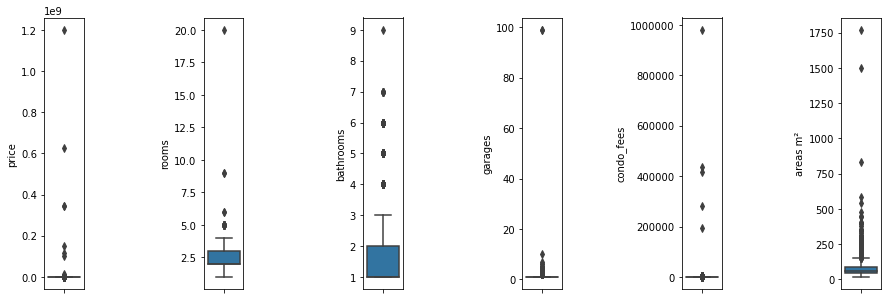

In [114]:
df_n = df[cols]

# Plotting the boxplot of the 5 firsts features for look for inaccuracies and outliers.

l = df_n.columns.values
ncols = int(len(l))
nrows = 1

fig,ax2d = plt.subplots(nrows,ncols)
fig.set_size_inches(15,5)
fig.subplots_adjust(wspace=3)

ax = np.ravel(ax2d)
ax[-2].ticklabel_format(style='plain')
ax[-1].ticklabel_format(style='plain')

for count,i in enumerate(df_n):
    
    sns.boxplot(y = df_n[i],ax = ax[count])

In [115]:
# Removing higher outliers from prices
new_df = df[df['price']<80000000]

# Removing higher outliers from areas m²
 
new_df = new_df[new_df['areas m²']<500]

# Removing outliers higher from garages 
new_df = new_df[new_df['garages']<20]

# Removing  higher outliers from condo_fees 

new_df = new_df[new_df['condo_fees']<5000]

#Probably the rooms equal 20 are equal to 2, let's change that

new_df.loc[new_df['rooms']==20,'rooms']=2


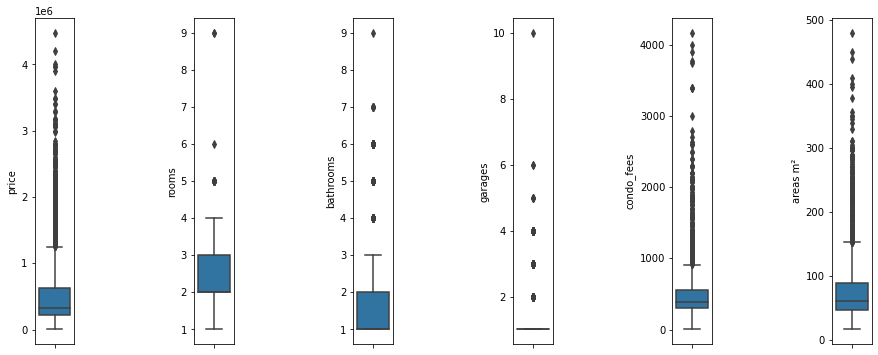

In [116]:
df_n = new_df[cols]

# Ploting the box plot again

l = df_n.columns.values
ncols = int(len(l))
nrows = 1


fig,ax2d = plt.subplots(nrows,ncols)
fig.set_size_inches(15,6)
fig.subplots_adjust(wspace=3)


ax = np.ravel(ax2d)
ax[-1].ticklabel_format(style='plain')

for count,i in enumerate(df_n):
    
    sns.boxplot(y = df_n[i],ax = ax[count])

In [117]:
new_df.shape

(3076, 10)

<a id="dp"></a>
## 8.3 Distribution Plot

In [118]:
dist = new_df[new_df.columns[:-1]]

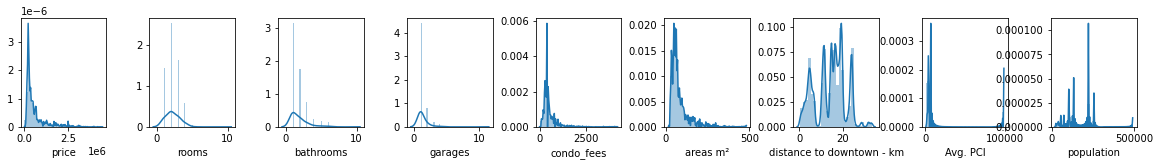

In [119]:
# Plotting the distribution to see the curve

fig, axes = plt.subplots(nrows=1, ncols=9)
fig.set_size_inches(20,2)
fig.subplots_adjust(hspace=0.5,wspace=0.5)

for i,column in enumerate(dist.columns):
    sns.distplot(dist[column], ax=axes[i],kde_kws={'bw': 0.5})

<a id="ltaps"></a>
## 8.5 Log Transformation and Preprocessing Scale 

As seen above, the graphs are not similar to a Gaussian distribution. Also the scale of the numbers are very different as we expected. 

For the normalization we will use numpy.log and for scale we will use preprocessing scale.

In [120]:
from sklearn import preprocessing

In [121]:
# Normalization and scaling 

log_scale = pd.DataFrame(preprocessing.scale(np.log(dist)))

In [122]:
cols_name = dist.columns
log_scale.columns = cols_name

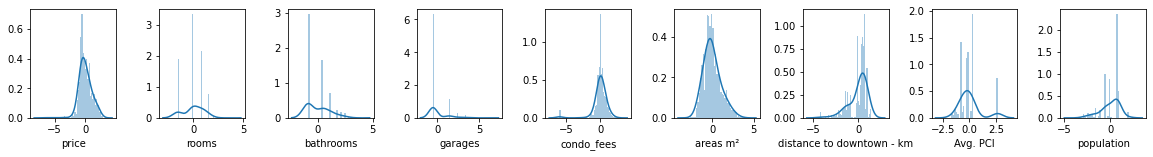

In [123]:
# Plotting again the distribution after normalize and scale

fig, axes = plt.subplots(nrows=1, ncols=9)
fig.set_size_inches(20,2)
fig.subplots_adjust(hspace=0.5,wspace=0.5)

for i,column in enumerate(log_scale.columns):
    sns.distplot(log_scale[column], ax=axes[i],kde_kws={'bw': 0.5})

<a id="c"></a>
## 8.6 Correlation Plot

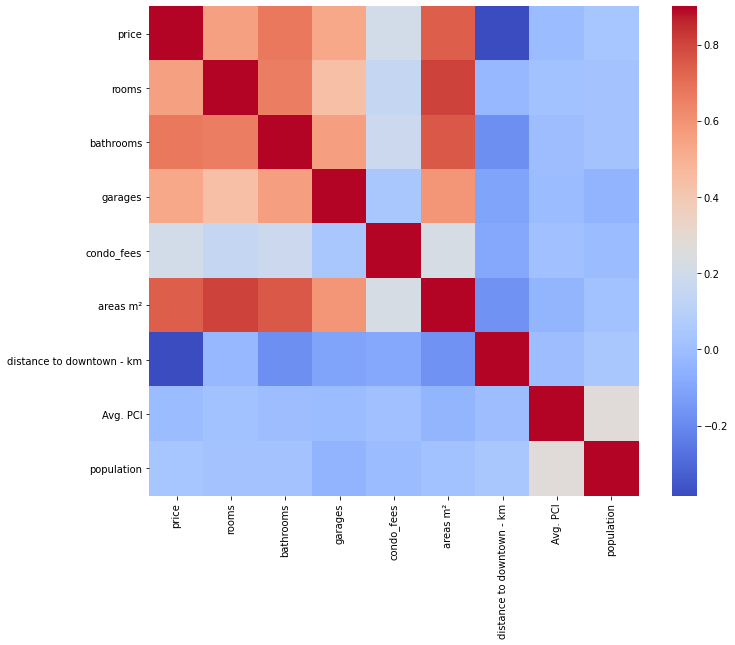

In [124]:
# Plotting the Heat Map to better understand the feature correlations

corrmat = log_scale.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, cmap='coolwarm');

<a id="M"></a>
# 9 Modeling

In [125]:
df.to_csv("Brazilian_Apartaments_Modeling.csv")

For modeling we are going to create a pipeline that also will tuning our parameters based on a cross validation.

However, before that we will split into Train Tests a df where the categorical values are converted into dummy and the numeric values are normalized and scaled except for the price of the apartaments. Where we will keep the original prices to compare the prediction.


<a id="tts"></a>
## 9.1 Train Test Split

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
# Creating a df with the categorical values converted to dummies

neighborhood = pd.get_dummies(new_df)
neighborhood = neighborhood[neighborhood.columns[9:]]

In [128]:
# Defining X with the merging df of the log_scale and neighborhood

X = pd.merge(log_scale[log_scale.columns[1:]],neighborhood,how = 'left',left_index = True, right_index = True)

# Defining y as the value without scale or log normalization

y = new_df[new_df.columns[0]]

In [129]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42, shuffle=False)

print('Train Len - ',len(X_train))
print('Test Len - ',len(X_test))

Train Len -  2153
Test Len -  923


<a id="pht"></a>
## 9.2 Pipeline Hyperparameter Tuning

To choose the best model we will try **Lasso (l1)**, **Kernel Ridge (l2)**, **Elastic NNet**, **Xgb Regressor** or **Lgbm Regressor** . We are going to create a **Pipeline** with **Hyperparameter Tuning** using **Grid Search** and 10 **K-Folds** shuffled. The scored used will be **neg_root_mean_squared_error**. Also for the Grid Search we are going to scale and normalize our dependent variable (y_train).

In [130]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import ElasticNet, Lasso  
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
import lightgbm as lgb 
from lightgbm import LGBMRegressor

In [131]:
%time

pipe = Pipeline([('regression', Lasso())])

grid_param = [ 
                {'regression':[Lasso()],
                 'regression__alpha':np.linspace(0.001,10, 10),
                },
                {
                 'regression':[KernelRidge()],
                 'regression__alpha':np.linspace(0.001,10, 10),
                 'regression__kernel':['polynomial'],
                },
    
                {'regression':[ElasticNet()],
                 'regression__alpha':np.linspace(0.001,10, 10),
                },
                
                {'regression':[xgb.XGBRegressor()],
                 'regression__colsample_bytree':[1],
                 'regression__max_depth':[10,15,20],
                 'regression__gamma':np.linspace(0.0,0.5,3),
                 'regression__n_estimators':[1500,2000,3000],
                 'regression__learning_rate':np.linspace(0.005,0.05, 3),
                 'regression__eval_metric':['rmse']
                },
                
                {'regression':[lgb.LGBMRegressor()],
                 'regression__objective':['regression'],
                 'regression__max_depth':[10,15,20],
                 'regression__learning_rate':np.linspace(0.005,0.05, 3),
                 'regression__n_estimators':[1500,2000,3000],
                 'regression__feature_fraction':[1],
                 'regression__metric':['rmse'],
                 }
    
            ]
n_folds = 10
kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
gridsearch = GridSearchCV(pipe, grid_param, verbose=0, n_jobs=-1, cv = kf, scoring='neg_root_mean_squared_error')
best_model = gridsearch.fit(X_train,preprocessing.scale(np.log(y_train)))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs


/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [132]:
best_model.best_estimator_

Pipeline(steps=[('regression',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, eval_metric='rmse',
                              gamma=0.25, gpu_id=-1, importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.027500000000000004,
                              max_delta_step=0, max_depth=15,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=2000,
                              n_jobs=0, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='exact',
                              validate_parameters=1, verbosity=None))])

In [133]:
nan = None
best_model = best_model.best_estimator_[0]

<a id="R"></a>
# 10 Results

Finally the results! Here we are going to calculate the score on the train and in the test data frame to look for overfitting. Also we will see the predictions as real values, plot the **prediction error** of our model using the **yellow brick** and calculate the metric using **sklearn metrics**. Lastly we are going to save the model using **joblib**.

<a id="scor"></a>
## 10.1 Score Rˆ2

In [134]:
model = best_model.fit(X_train,y_train)

In [135]:
model.score(X_train,y_train)

0.9999939089497386

In [136]:
model.score(X_test, y_test)

0.8532872917142662

<a id="pred"></a>
## 10.2 Predictions

In [137]:
pd.options.display.float_format = "{:.2f}".format


In general we cannot expect to get exactly correct results from a regression model. What we hope for is that your predictions are overall close to the real values.

In [138]:
y_pred = model.predict(X_test)

pred = pd.DataFrame(y_pred).reset_index(drop=True)
test = pd.DataFrame(y_test).reset_index(drop=True)

pd.merge(test,pred,how = 'left',left_index = True, right_index = True).rename(columns = {'value': 'test', 0: 'pred'}, inplace = False)

,price,pred
0,280000.00,317061.97
1,1260000.00,1418956.75
2,219900.00,264325.69
3,350000.00,334815.19
4,180000.00,245003.78
...,...,...
918,515000.00,479527.56
919,821125.00,533506.56
920,215000.00,191396.86
921,215000.00,175742.36


That's seems a very good model, by the way.🤩

<a id="pep"></a>
## 10.3 Prediction Error Plot

In [139]:
from yellowbrick.regressor import PredictionError

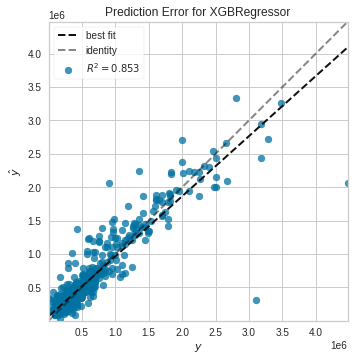

In [140]:
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train.values)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test.values)  # Evaluate the model on the test data
visualizer.show()   


<a id="mr"></a>
## 10.4 Metrics Results

In [141]:
import sklearn.metrics as sm

In [142]:
test = preprocessing.scale(y_test)
pred = preprocessing.scale(y_pred)

print("Mean absolute error =", round(sm.mean_absolute_error(test, pred), 5)) 
print("Mean squared error =", round(np.sqrt(sm.mean_squared_error(test, pred)), 5)) 
print("Median absolute error =", round(sm.median_absolute_error(test, pred), 5)) 
print("Explain variance score =", round(sm.explained_variance_score(test, pred), 5))
print("R2 score =",round(sm.r2_score(test, pred),5))

Mean absolute error = 0.18703
Mean squared error = 0.38578
Median absolute error = 0.09873
Explain variance score = 0.85117
R2 score = 0.85117


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


<a id="sm"></a>
## 10.5 Saving the model

In [143]:
import joblib

In [144]:
joblib.dump(model, 'apt_value_pred_model.sav')

['apt_value_pred_model.sav']

<a id="CON"></a>
# 11 Conclusion

The main idea of this notebook was accomplished.  We deal with a relatively small data set extracted with Web Scraping and with hard work in the feature engineering, were able to build a very good predictor of prices for apartments in Brasília. 
That was my first regression project and I really wanna know what you guys think about it.

<h3>If you like the notebook, please upvote and leave your feedback in the comments' section !</h3>

<br>
That's it for now.

<br>
<br>

Cheers 🍀

<br>
<br>
<br>
<br>




You can also see my [Classification E-commerce Transaction](https://www.kaggle.com/erickvarela/ga-api-classification-e-commerce-transaction)
and my [E-commerce Exploratory Analysis](https://www.kaggle.com/erickvarela/ga-api-e-commerce-exploratory-analysis)

<br>
<br>

[Back to the top](#top)


